# Project objective
in this notebook we will investigate the effeciency of using DT model and SVM on the supplier selection problem using scklearn library as the main package for modeling. the section will be divided based on training and testing phase into:


*   Training phase for the DT, SVM, and Ensemble method for both models
*   Testing phase for the DT, SVM, and Ensemble method for both models



## Training phase using team data


### Importing libraries and functions

In [ ]:
# installing needed libraries
!pip install ISLP

# Importing libraries
from ISLP.svm import plot as plot_svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.utils import resample

### Importing and bootstraping the data

In [ ]:
# Importing data that is provided by the team
supplier_df = pd.read_csv('/content/training data.csv')

# bootstrapping with replacment to scale the data to 10000 readings
supplier_df = resample(supplier_df, replace=True,
                       n_samples= 10000,).reset_index().drop(columns='index')
# creating y label as an average function of the rating columns
supplier_df['total rating'] = (supplier_df['Quality Rating ']+
                        supplier_df['Quantity Rating ']+
                        supplier_df['On-Time Rating ']) /3
supplier_df['total rating'] = supplier_df['total rating'].astype('int')

### Visualizing correlations and outliers


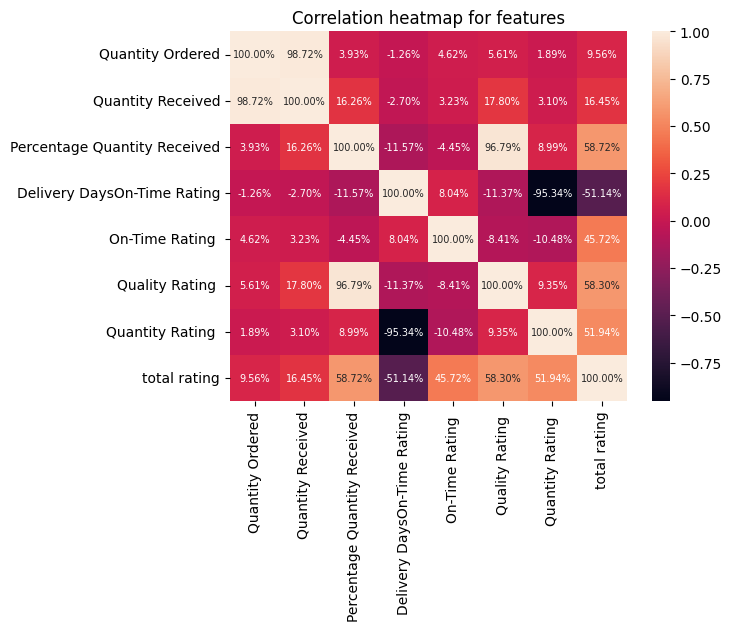

In [ ]:
# visualizing correlation of features
sns.heatmap(supplier_df.corr(),annot=True,fmt=".2%",annot_kws={"size":7})
plt.title('Correlation heatmap for features')
plt.show()

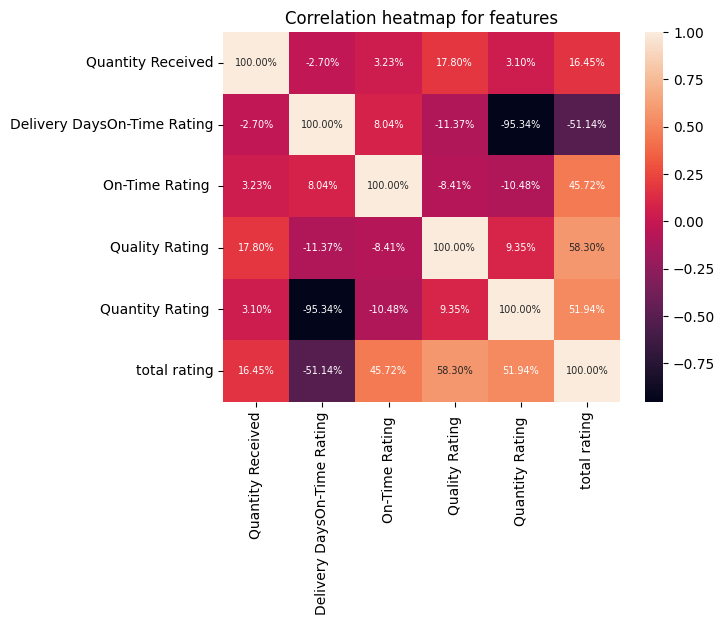

In [ ]:
# dropping highly correlated columns to prevent colinearity
supplier_df = supplier_df.drop(columns=['Quantity Ordered',
                                        'Percentage Quantity Received'])
# visualizing correlation of features
sns.heatmap(supplier_df.corr(),annot=True,fmt=".2%",annot_kws={"size":7})
plt.title('Correlation heatmap for features')
plt.show()

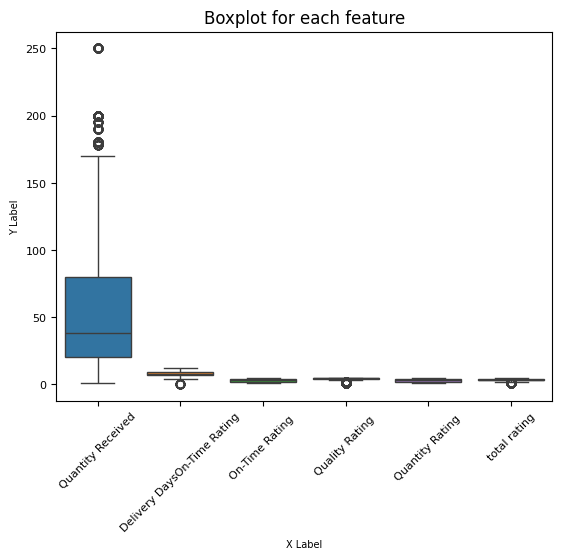

In [ ]:
# visuailize boxplot for outlier screening
sns.boxplot(data=supplier_df)
plt.title('Boxplot for each feature')
plt.xticks(rotation=45)
ax = plt.gca()
ax.set_xlabel('X Label', fontsize=7)
ax.set_ylabel('Y Label', fontsize=7)
ax.tick_params(labelsize=8)
plt.show()

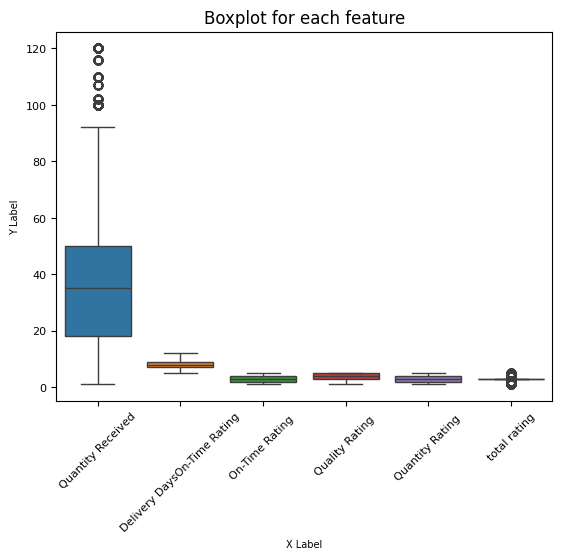

In [ ]:
# removing outliers
supplier_df = supplier_df[(supplier_df['Quantity Received']
                           <np.quantile(supplier_df['Quantity Received'],0.90))
                          &
                           (supplier_df['Delivery DaysOn-Time Rating']
                           >np.quantile(
                               supplier_df['Delivery DaysOn-Time Rating'],0.01))
                          ]
# visuailize boxplot for outlier screening
sns.boxplot(data=supplier_df)
plt.title('Boxplot for each feature')
plt.xticks(rotation=45)
ax = plt.gca()
ax.set_xlabel('X Label', fontsize=7)
ax.set_ylabel('Y Label', fontsize=7)
ax.tick_params(labelsize=8)
plt.show()

\Notice that due to the bad quality of the data. too many outliers were found and removing all of them will lead to substantial decrease in sample size. therfore we decided to select data between 0.05% for Delivery DaysOn-Time Rating and 0.90% for Quantity Received

### **DT modeling module**

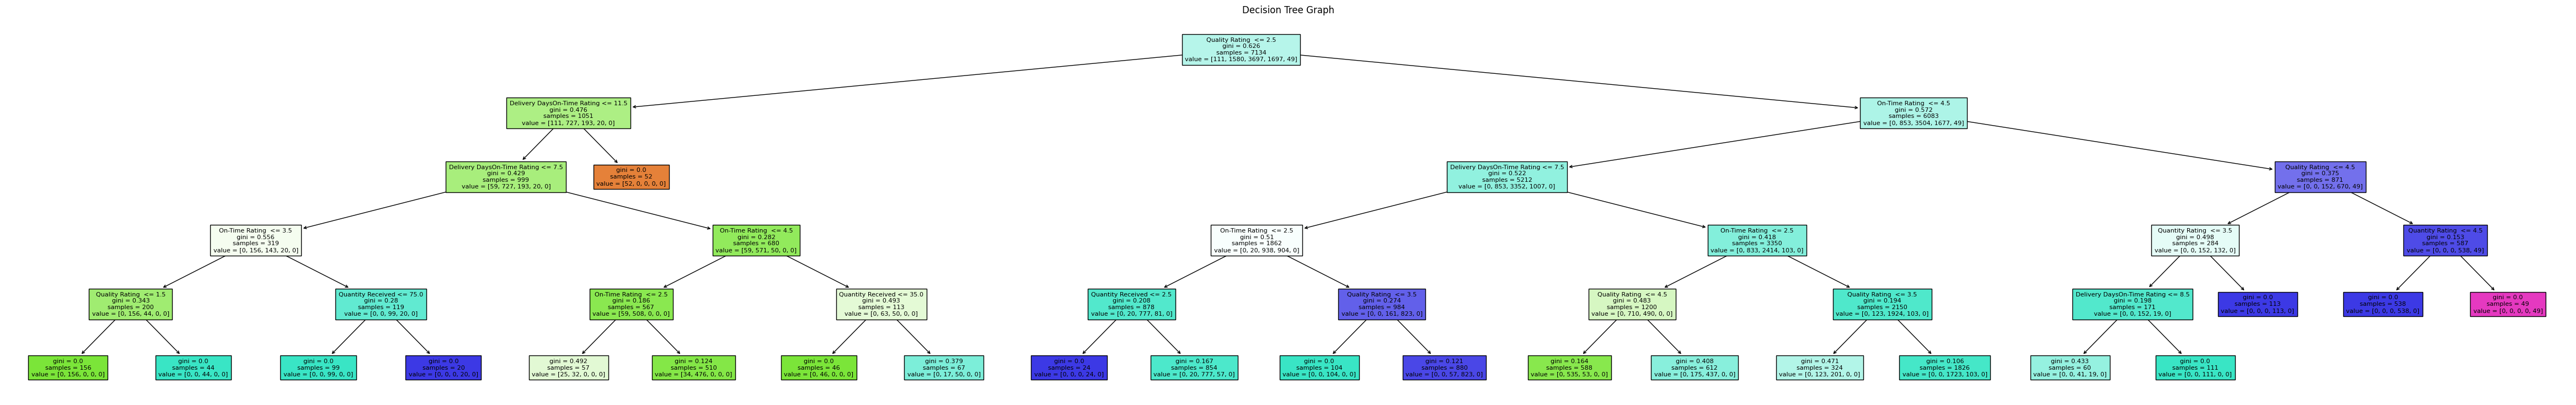

ACCURACY= 0.9030976965845909 
 MSE= 0.09690230341540905
CV mean = 0.9105240081729951 
 CV std = 0.012131115686884872
              precision    recall  f1-score   support

           1       1.00      0.55      0.71        11
           2       0.94      0.78      0.85       286
           3       0.87      0.97      0.92       656
           4       0.96      0.89      0.93       300
           5       1.00      1.00      1.00         6

    accuracy                           0.90      1259
   macro avg       0.95      0.84      0.88      1259
weighted avg       0.91      0.90      0.90      1259



In [ ]:
# subseting features and labels
X = supplier_df.drop(columns='total rating')
Y = supplier_df['total rating']

# splitting the data
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size= 0.15,
                                                  random_state=198)
# preforming K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# creating model and fitting
dt = DecisionTreeClassifier(max_depth=5)

# model fitting
dt.fit(X_train, Y_train)

# visualizing DT calssification
plt.figure(figsize=(60,9))
plot_tree(dt, feature_names= X.columns, filled=True,fontsize=8)
plt.title('Decision Tree Graph')
plt.show()

# predicting test set labels accuracy and mean squared error
y_pred = dt.predict(X_test)
cv_score = cross_val_score(dt, X, Y, cv=kf)
print('ACCURACY=',accuracy_score(Y_test, y_pred),
      '\n','MSE=',MSE(Y_test, y_pred))
print('CV mean =',cv_score.mean(),'\n',
      'CV std =',cv_score.std())
cr = classification_report(Y_test, y_pred)

print(cr)

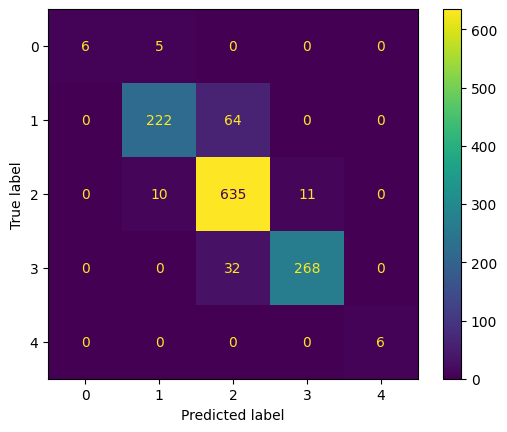

<Figure size 1600x900 with 0 Axes>

In [ ]:
# visualizing confusion matrices
cm = confusion_matrix(Y_test, y_pred, labels=None,
                      sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.figure(figsize=(16,9))
plt.show()

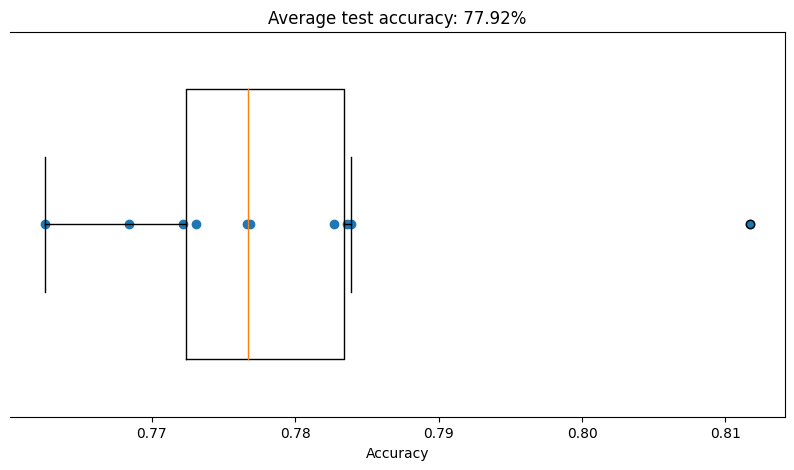

In [ ]:
#visualize average cv accuracy score
n_cv= 10
f, ax = plt.subplots(figsize=(10,5))
ax.boxplot(cv_score, vert=False, widths=.7)
ax.scatter(cv_score, np.ones(n_cv))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {cv_score.mean():.2%}"
)
ax.spines["left"].set_visible(False)
plt.show()

### **Using SVM model on randomized data**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ACCURACY= 0.7912772585669782 
 MSE= 0.2087227414330218
CV mean = 0.7791677597420341 
 CV std = 0.012652392811690743
              precision    recall  f1-score   support

           1       1.00      0.23      0.37        22
           2       0.91      0.60      0.72       277
           3       0.75      0.99      0.85       711
           4       0.89      0.54      0.67       266
           5       0.00      0.00      0.00         8

    accuracy                           0.79      1284
   macro avg       0.71      0.47      0.52      1284
weighted avg       0.81      0.79      0.77      1284



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


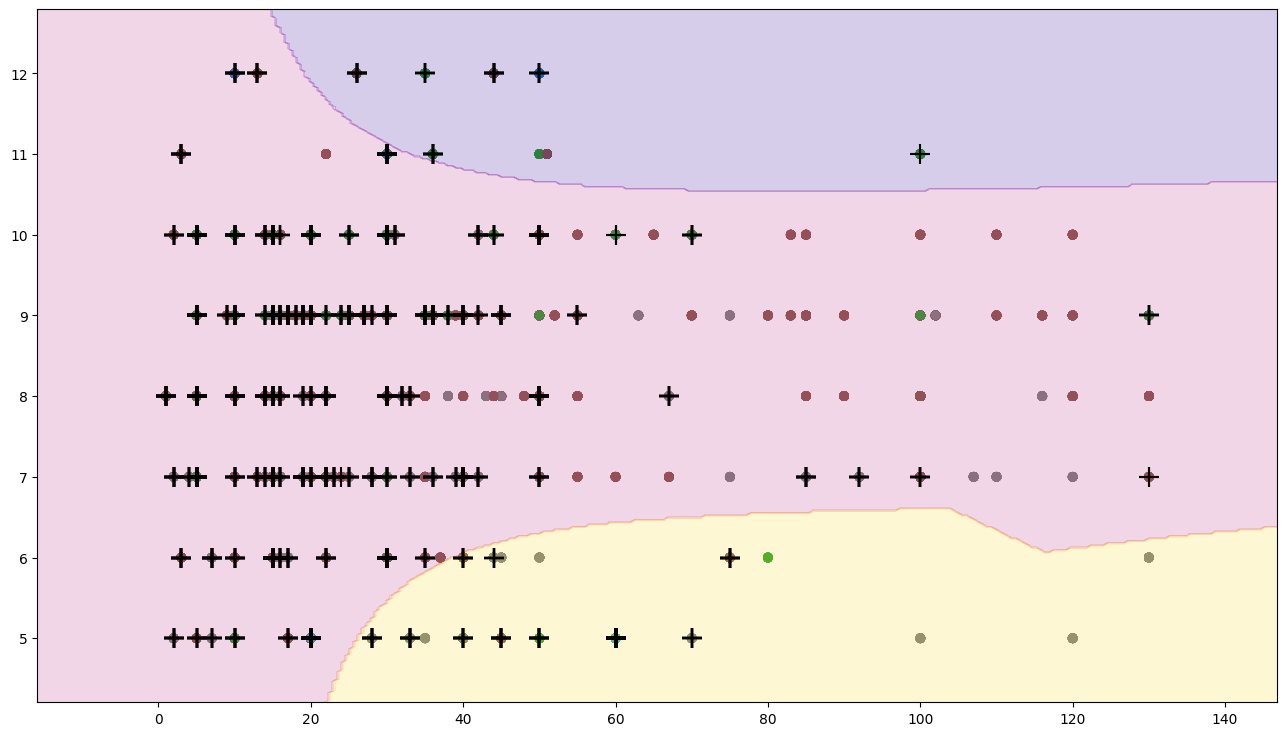

In [ ]:
# preforming K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Here we replicate what was preformed on previous dt model but with SVM
svm_model = svm.SVC(C=10, kernel='poly').fit(X_train, Y_train)
y_pred2 = svm_model.predict(X_test)
cv_score = cross_val_score(svm_model, X, Y, cv=kf)
fig, ax = plt.subplots(figsize=(16,9))

#visualizing SVM calssification
plot_svm(X_train,
         Y_train,
         svm_model,
         ax=ax)

print('ACCURACY=',accuracy_score(Y_test, y_pred2),
      '\n','MSE=',MSE(Y_test, y_pred2))
print('CV mean =',cv_score.mean(),'\n',
      'CV std =',cv_score.std())
cr = classification_report(Y_test, y_pred2)
print(cr)

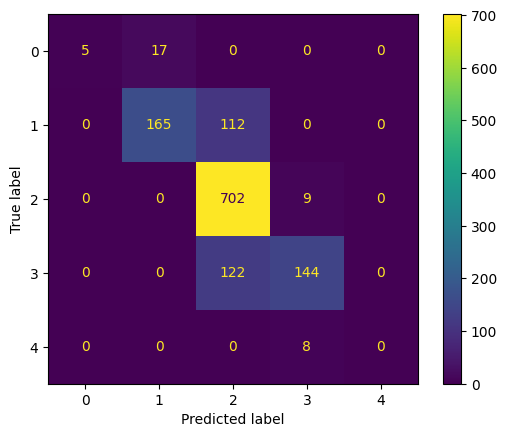

<Figure size 1600x900 with 0 Axes>

In [ ]:
# visualizing confusion matrices
cm = confusion_matrix(Y_test, y_pred2, labels=None,
                      sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.figure(figsize=(16,9))
plt.show()

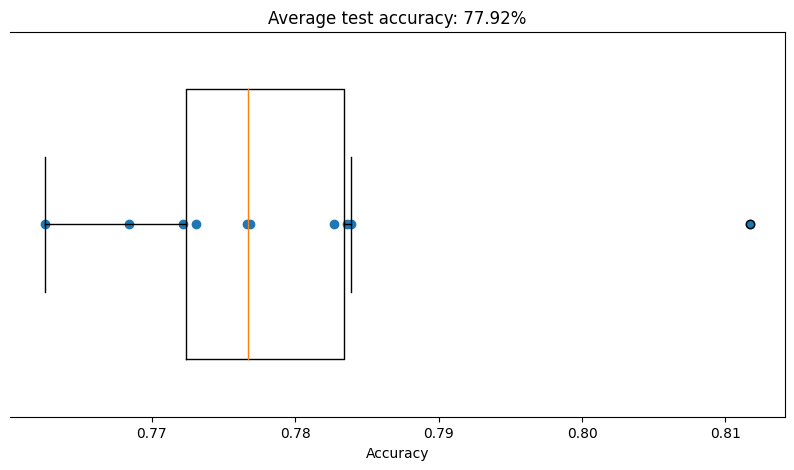

In [ ]:
#visualizing cv
n_cv= 10
f, ax = plt.subplots(figsize=(10,5))
ax.boxplot(cv_score, vert=False, widths=.7)
ax.scatter(cv_score, np.ones(n_cv))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {cv_score.mean():.2%}"
)
ax.spines["left"].set_visible(False)
plt.show()

### Using Ensemble learning to combine both accuracies

In [ ]:
# creating and fitting ensemble model to combine DT and SVM predictive powers
ensemble_clf = VotingClassifier(estimators=[('dt', dt), ('svm', svm_model)],
                                voting='hard')
ensemble_clf.fit(X_train, Y_train)
ensemble_pred = ensemble_clf.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(Y_test, ensemble_pred))
print('MSE=',MSE(Y_test, y_pred2))

Ensemble Model Accuracy: 0.8574766355140186
MSE= 0.2087227414330218


# Testing phase using Data made up by the team





In [ ]:
# Importing and resampling data for testing
df2 = pd.read_csv('/content/testing data.csv')
df2 = resample(df2, replace=True,
               n_samples = 10000).reset_index().drop(
               columns=['index','Supplier Name'])

### Visualizing correlations and outliers

<ipython-input-24-1c99c4253867>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True,fmt=".2%",annot_kws={"size":7})


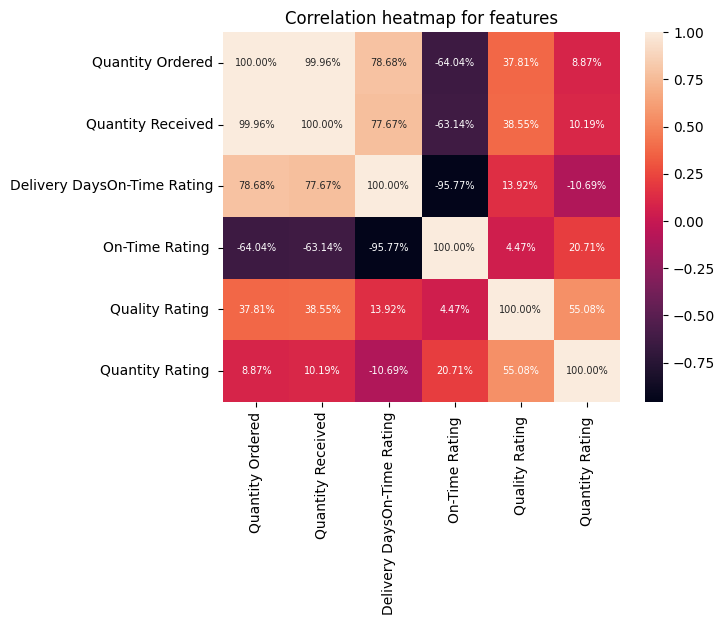

In [ ]:
# visualizing correlation of features
sns.heatmap(df2.corr(),annot=True,fmt=".2%",annot_kws={"size":7})
plt.title('Correlation heatmap for features')
plt.show()

<ipython-input-21-927a750ca09a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True,fmt=".2%",annot_kws={"size":7})


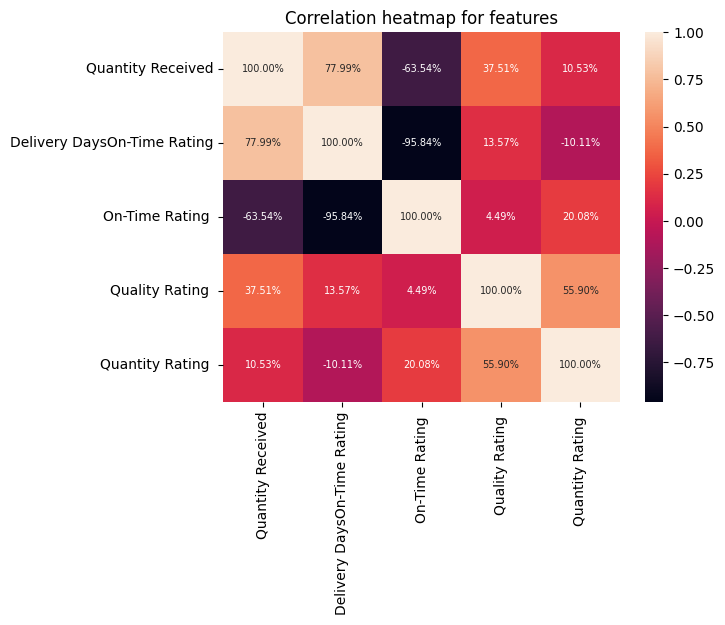

In [ ]:
# dropping highly correlated columns to prevent colinearity
df2 = df2.drop(columns=['Quantity Ordered','Percentage Quantity Received'])
# visualizing correlation of features
sns.heatmap(df2.corr(),annot=True,fmt=".2%",annot_kws={"size":7})
plt.title('Correlation heatmap for features')
plt.show()

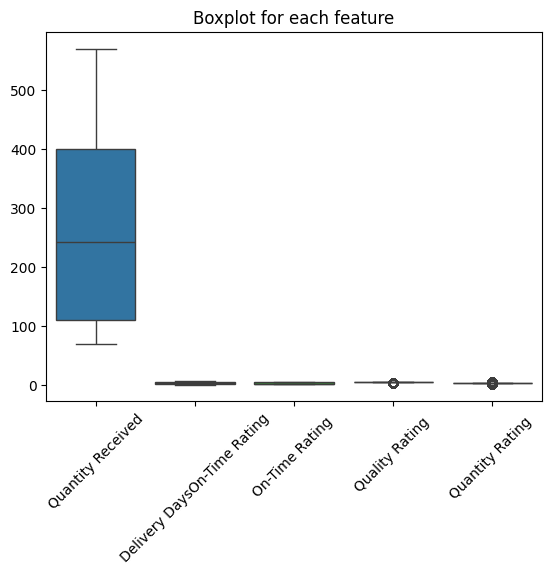

In [ ]:
# visuailize boxplot for outlier screening
sns.boxplot(data=df2)
plt.title('Boxplot for each feature')
plt.xticks(rotation=45)
plt.show()

## Applying all models on team data



In [ ]:
# Predicting labels of the 3 models
dt_data = dt.predict(df2)
svm_data = svm_model.predict(df2)
en_data = ensemble_clf.predict(df2)
df2['label_dt'] = dt_data
df2['label_svm'] = svm_data
df2['label_en_combined'] = en_data

# visualizing count plot
sns.catplot(data=df2,x='label_dt',kind='count',hue='label_dt')
plt.title('DT labeling of the team data')
plt.figure(figsize=(16,9))
plt.show()
sns.catplot(data=df2,x='label_svm',kind='count',hue='label_svm')
plt.title('SVM labeling of the team data')
plt.figure(figsize=(16,9))
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Percentage Quantity Received
- Quantity Ordered


## Using Ensemble learning to combine both accuracies

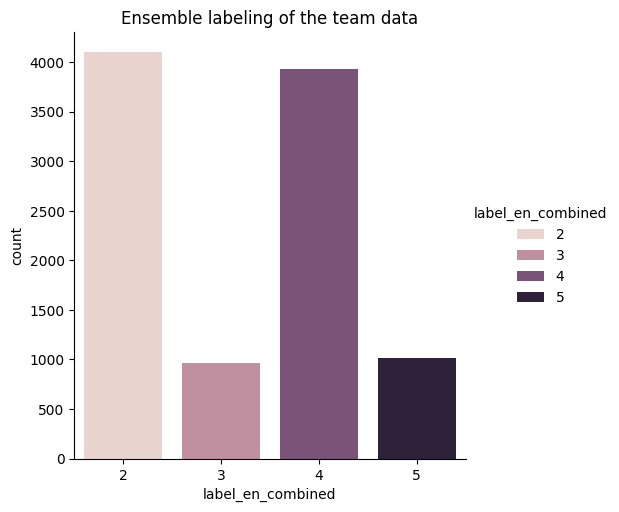

<Figure size 1600x900 with 0 Axes>

In [ ]:
sns.catplot(data=df2,x='label_en_combined',kind='count',
            hue='label_en_combined')
plt.title('Ensemble labeling of the team data')
plt.figure(figsize=(16,9))
plt.show()

# **Result**

Here we compare which supplier is the best based on each model classification

In [ ]:
df2['label_dt'].sort_values(ascending=False)

KeyError: 'label_dt'

In [ ]:
df2['label_svm'].sort_values(ascending=False)

3946    5
3003    5
8072    5
1265    5
8074    5
       ..
6359    2
6358    2
6357    2
2370    2
0       2
Name: label_svm, Length: 10000, dtype: int64

In [ ]:
df2['label_en_combined'].sort_values(ascending=False)

3531    5
7880    5
2684    5
1171    5
2685    5
       ..
2090    2
6186    2
6185    2
6184    2
0       2
Name: label_en_combined, Length: 10000, dtype: int64